In [165]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [166]:
df = yf.download('AAPL',start='2020-01-01',end='2024-04-01')
df.head(20)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,72.960442,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.251137,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.826859,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.484352,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.650368,132079200
2020-01-09,76.809998,77.607498,76.550003,77.407501,75.214760,170108400
2020-01-10,77.650002,78.167503,77.062500,77.582497,75.384789,140644800
2020-01-13,77.910004,79.267502,77.787498,79.239998,76.995338,121532000
2020-01-14,79.175003,79.392502,78.042503,78.169998,75.955643,161954400


In [167]:
df.shape

(1067, 6)

In [168]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1.067000e+03
mean,143.025530,144.659370,141.492369,143.153355,141.452000,9.683922e+07
std,33.768796,33.865376,33.644654,33.766705,34.141017,5.370459e+07
min,57.020000,57.125000,53.152500,56.092499,54.632889,2.404830e+07
25%,124.980000,126.381248,123.841248,125.039997,122.914200,6.185145e+07
50%,147.220001,149.050003,145.809998,147.410004,145.815475,8.222550e+07
75%,170.974998,172.629997,169.479996,171.135002,169.797562,1.138023e+08
max,198.020004,199.619995,197.000000,198.110001,197.589523,4.265100e+08


In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1067 entries, 2020-01-02 to 2024-03-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1067 non-null   float64
 1   High       1067 non-null   float64
 2   Low        1067 non-null   float64
 3   Close      1067 non-null   float64
 4   Adj Close  1067 non-null   float64
 5   Volume     1067 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 58.4 KB


array([[<Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>],
       [<Axes: title={'center': 'Low'}>,
        <Axes: title={'center': 'Close'}>],
       [<Axes: title={'center': 'Adj Close'}>,
        <Axes: title={'center': 'Volume'}>]], dtype=object)

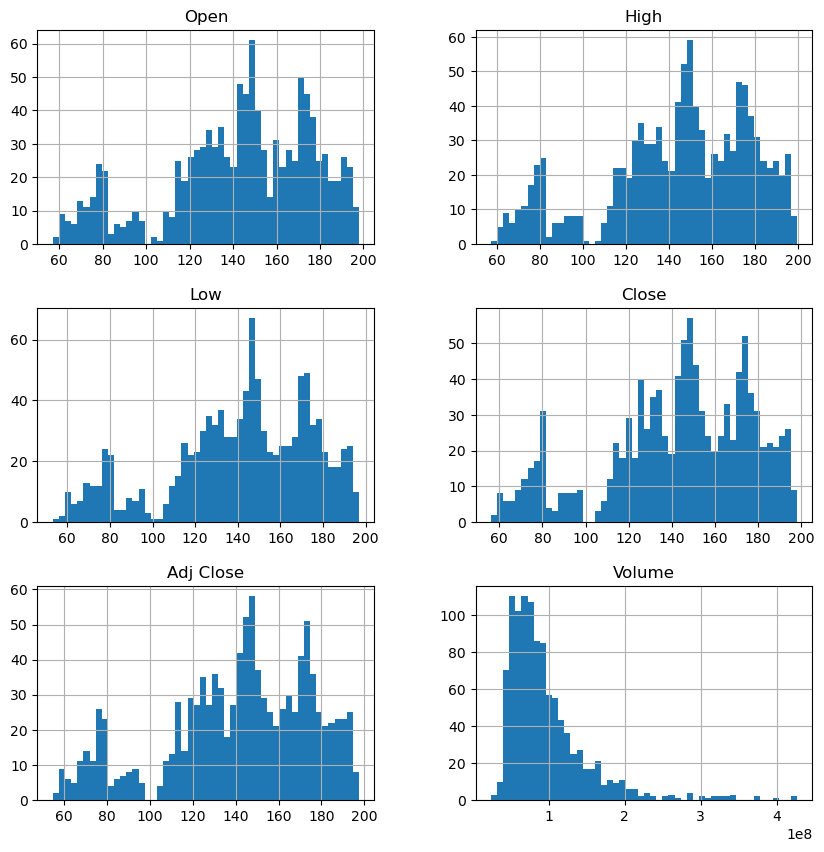

In [170]:
df.hist(bins=50,figsize=(10,10))

In [171]:
df["HL_Perc"] = (df["High"]-df["Low"]) / df["Low"] * 100
df["CO_Perc"] = (df["Close"] - df["Open"]) / df["Open"] * 100

In [172]:
df = df[["HL_Perc", "CO_Perc", "Adj Close", "Volume"]]

In [173]:
df["PriceNextMonth"] = df["Adj Close"].shift(-30)

/var/folders/qj/fxsf77sd1p38mdc08b1lfqrr0000gn/T/ipykernel_4089/2029729962.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["PriceNextMonth"] = df["Adj Close"].shift(-30)


In [174]:
df.tail()

,HL_Perc,CO_Perc,Adj Close,Volume,PriceNextMonth
Date,,,,,
2024-03-22,1.758206,0.302751,172.046646,71106600,NaN
2024-03-25,1.469463,0.164155,170.618591,54288300,NaN
2024-03-26,1.085031,-0.170584,169.480133,57388400,NaN
2024-03-27,2.051617,1.701774,173.075241,60273300,NaN
2024-03-28,1.008739,-0.157208,171.247726,65672700,NaN


In [175]:
X = np.array(df.drop(columns="PriceNextMonth",axis= 1))
X = preprocessing.scale(X)
X_Check = X[-30:]
X = X[:-30]
df.dropna(inplace = True)
y = np.array(df["PriceNextMonth"])

/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:240: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/var/folders/qj/fxsf77sd1p38mdc08b1lfqrr0000gn/T/ipykernel_4089/2492121259.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace = True)


In [176]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=1)

In [177]:
scaler = StandardScaler()

In [178]:
X_train = scaler.fit_transform(X_train) 

In [179]:
model = GradientBoostingRegressor(n_estimators=100, max_depth=3, learning_rate=0.1)

In [180]:
model.fit(X_train, y_train)

GradientBoostingRegressor()

In [181]:
accuracy = model.score(X_train, y_train)
accuracy

0.9320937300829708

In [182]:
model.fit(X,y)

GradientBoostingRegressor()

In [190]:
y_pred = model.predict(X_test)
y_pred

array([144.61391942, 144.60409906, 154.40267795, 184.51619472,
       133.16352138, 136.12548659,  79.37254403, 155.5665079 ,
       159.89974789, 122.42002763, 184.08456001, 134.69402984,
       174.01205078, 140.71139735, 156.0188567 , 159.74814894,
        69.49830145, 129.10192398, 136.12765642, 152.24101123,
       152.16990102,  70.17786262, 142.28003919,  69.64257638,
       165.10451672, 168.58249247, 150.35753928, 170.7949913 ,
       151.63147239, 157.77624286, 127.65407492, 126.43023435,
       141.71788782,  76.02512832, 155.17147189, 135.22532857,
       139.57297892, 158.48007311, 111.19914994, 145.68189359,
       144.62784342, 143.7606437 , 130.50809578, 175.1548802 ,
        69.89533921, 108.66114021, 156.5529941 , 153.95701028,
       134.64001384, 156.87108019, 142.17205208, 136.43176697,
        92.02458687, 145.36676441, 129.90548184, 147.88611201,
       136.76958118, 159.40389675, 177.38239993, 173.8648392 ,
       128.88365349, 151.96797194, 143.97770081,  80.69

In [193]:
y_test

array([128.60501099, 131.21896362, 145.82475281, 190.73757935,
       125.30828094, 134.03907776,  93.11293793, 152.33027649,
       162.24337769, 116.27479553, 197.58952332, 130.07679749,
       182.16950989, 146.93533325, 139.82295227, 147.04637146,
        63.91004181, 124.71837616, 140.30595398, 163.00328064,
       158.21972656,  69.25717163, 117.76379395,  59.78281021,
       155.36022949, 167.96342468, 147.88433838, 171.161026  ,
       137.02198792, 144.50511169, 131.26977539, 128.02194214,
       150.7724762 ,  70.14594269, 156.5166626 , 124.99365997,
       140.07522583, 161.57192993, 112.47410583, 146.56794739,
       134.3432312 , 135.19049072, 118.75512695, 188.93232727,
        68.95037842, 107.48869324, 153.61207581, 138.7897644 ,
       139.63342285, 157.87203979, 139.97633362, 140.05621338,
        94.73165131, 145.2780304 , 131.46575928, 143.61393738,
       146.64361572, 172.44096375, 178.36456299, 174.76879883,
       134.96325684, 157.3505249 , 150.02464294,  93.67

In [184]:
model_score = model.score(X_test, y_test)
model_score

0.9359693762155588

In [185]:
df

,HL_Perc,CO_Perc,Adj Close,Volume,PriceNextMonth
Date,,,,,
2020-01-02,1.832719,1.387394,72.960442,135480400,79.123596
2020-01-03,1.376049,0.094228,72.251137,146322800,77.674797
2020-01-06,2.462849,2.045672,72.826859,118387200,78.799728
2020-01-07,1.149651,-0.483585,72.484352,108872000,77.991318
2020-01-08,2.449858,2.029209,73.650368,132079200,76.225998
...,...,...,...,...,...
2024-02-08,1.168928,-0.564968,187.825256,40962000,172.046646
2024-02-09,1.058514,0.106023,188.594208,45155200,170.618591
2024-02-12,1.006481,-0.674028,186.896500,41781900,169.480133


In [186]:
df.tail(20)

,HL_Perc,CO_Perc,Adj Close,Volume,PriceNextMonth
Date,,,,,
2024-01-18,1.781197,1.364936,188.134445,78005800,179.416656
2024-01-19,1.657658,1.177835,191.056732,68741000,174.862823
2024-01-22,1.596800,0.826831,193.380600,60133900,169.889572
2024-01-23,0.990558,0.082037,194.667221,42355600,168.890915
2024-01-24,1.049711,-0.470780,193.988998,53631300,168.771088
2024-01-25,1.636375,-0.537856,193.659882,54822100,170.498734
2024-01-26,1.469205,-0.952286,191.914474,44594000,172.516006
2024-01-29,1.382000,-0.145825,191.226288,47145600,172.995346
2024-01-30,2.309704,-1.518806,187.545975,55859400,170.898209


Text(0, 0.5, 'Price')

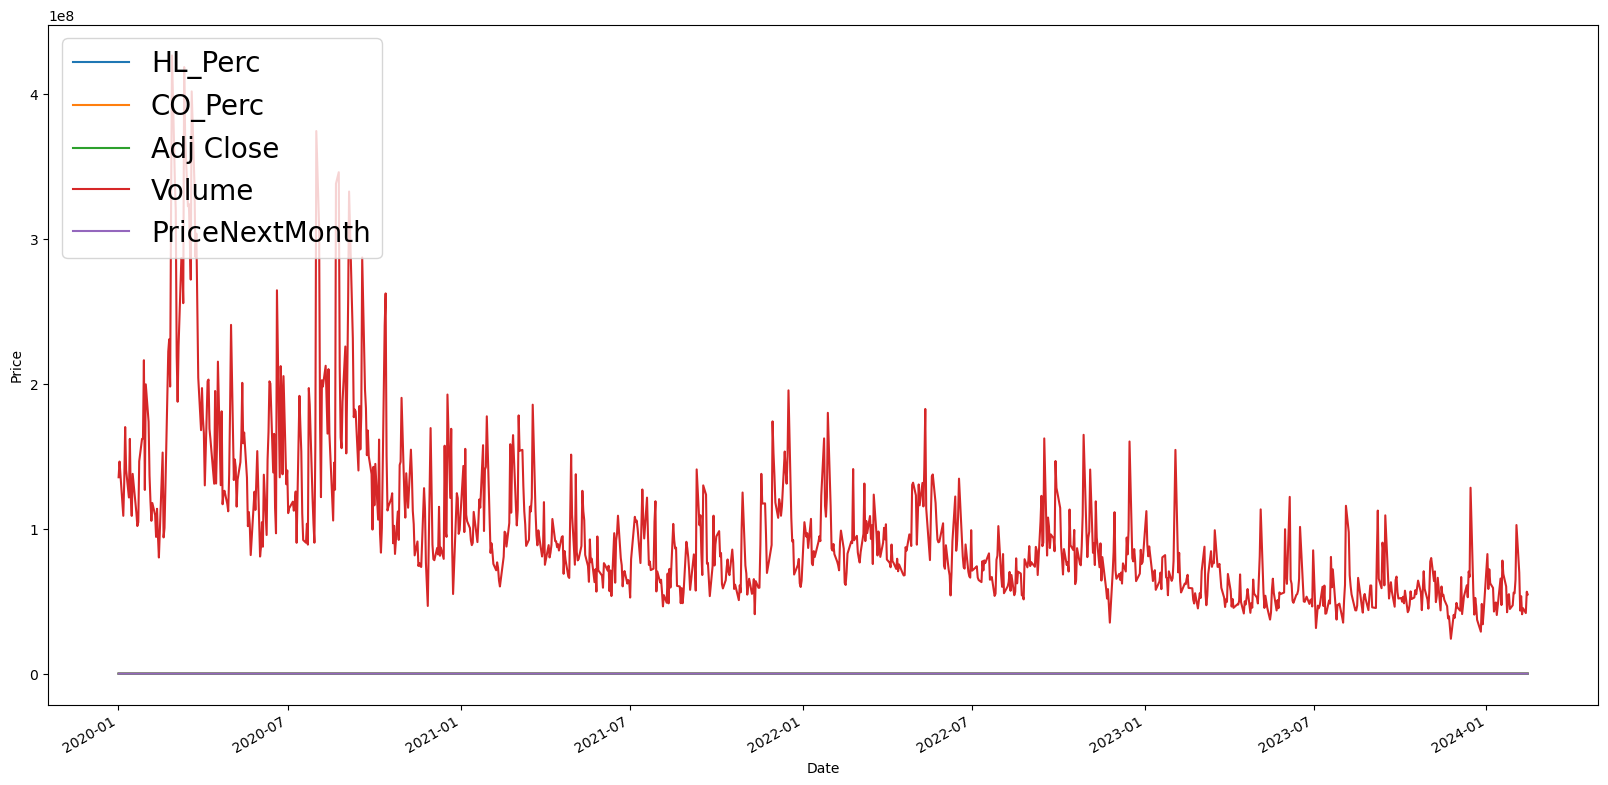

In [187]:
df.plot(figsize=(20,10), linewidth=1.5)
plt.legend(loc=2, prop={'size':20})
plt.xlabel('Date')
plt.ylabel('Price')

<Axes: xlabel='Date'>

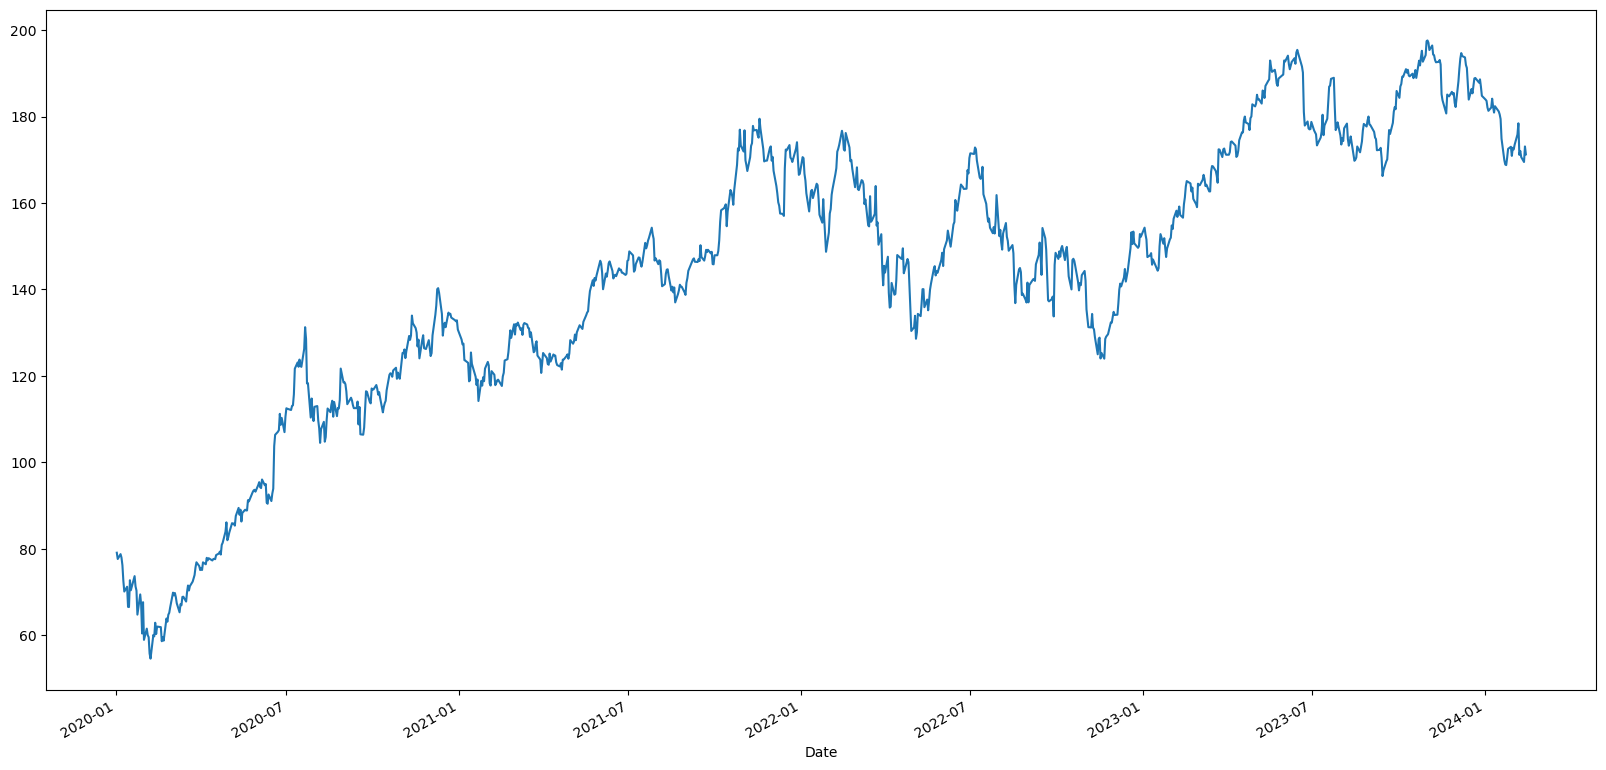

In [188]:
df.PriceNextMonth.plot(figsize=(20,10), linewidth=1.5)